This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 3ms/step - loss: 0.6213 - accuracy: 0.8103 - val_loss: 0.5295 - val_accuracy: 0.8173
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2592 - accuracy: 0.9187 - val_loss: 0.2521 - val_accuracy: 0.9217
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1655 - accuracy: 0.9492 - val_loss: 0.1550 - val_accuracy: 0.9530
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1154 - accuracy: 0.9646 - val_loss: 0.1393 - val_accuracy: 0.9581
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0846 - accuracy: 0.9732 - val_loss: 0.1904 - val_accuracy: 0.9439
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0608 - accuracy: 0.9802 - val_loss: 0.1712 - val_accuracy: 0.9513
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0464 - accuracy: 0.9858 - val_loss: 0.1198 - val_accuracy: 0.9669
Epoch 

**Plotting a validation accuracy comparison**

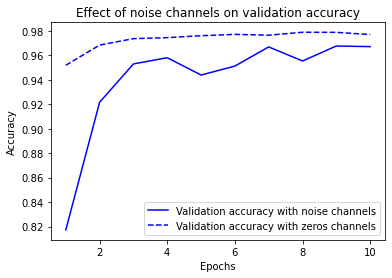

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=50,#100>>50
          batch_size=128,
          validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 1s 3ms/step - loss: 2.3161 - accuracy: 0.1037 - val_loss: 2.3064 - val_accuracy: 0.1074
Epoch 2/50
375/375 [==============================] - 1s 3ms/step - loss: 2.3001 - accuracy: 0.1172 - val_loss: 2.3137 - val_accuracy: 0.1050
Epoch 3/50
375/375 [==============================] - 1s 3ms/step - loss: 2.2904 - accuracy: 0.1288 - val_loss: 2.3144 - val_accuracy: 0.1065
Epoch 4/50
375/375 [==============================] - 1s 3ms/step - loss: 2.2774 - accuracy: 0.1400 - val_loss: 2.3243 - val_accuracy: 0.1023
Epoch 5/50
375/375 [==============================] - 1s 3ms/step - loss: 2.2602 - accuracy: 0.1546 - val_loss: 2.3355 - val_accuracy: 0.0988
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 2.2382 - accuracy: 0.1654 - val_loss: 2.3413 - val_accuracy: 0.1041
Epoch 7/50
375/375 [==============================] - 1s 3ms/step - loss: 2.2143 - accuracy: 0.1833 - val_loss: 2.3629 - val_accuracy: 0.1045
Epoch 

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 749.6042 - accuracy: 0.3374 - val_loss: 2.4474 - val_accuracy: 0.2477
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 3.2500 - accuracy: 0.2107 - val_loss: 2.2465 - val_accuracy: 0.2373
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 3.5513 - accuracy: 0.2420 - val_loss: 2.0675 - val_accuracy: 0.2365
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 3.1084 - accuracy: 0.2510 - val_loss: 2.7037 - val_accuracy: 0.2827
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.9874 - accuracy: 0.2890 - val_loss: 2.3993 - val_accuracy: 0.3030
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6668 - accuracy: 0.2884 - val_loss: 2.4401 - val_accuracy: 0.3071
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5917 - accuracy: 0.2983 - val_loss: 2.1330 - val_accuracy: 0.2708
Epoc

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3495 - accuracy: 0.9125 - val_loss: 0.1610 - val_accuracy: 0.9582
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1426 - accuracy: 0.9639 - val_loss: 0.1547 - val_accuracy: 0.9633
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1146 - accuracy: 0.9729 - val_loss: 0.1699 - val_accuracy: 0.9691
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1007 - accuracy: 0.9773 - val_loss: 0.2086 - val_accuracy: 0.9698
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0888 - accuracy: 0.9820 - val_loss: 0.2136 - val_accuracy: 0.9688
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0732 - accuracy: 0.9852 - val_loss: 0.2837 - val_accuracy: 0.9666
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0802 - accuracy: 0.9851 - val_loss: 0.2578 - val_accuracy: 0.9716
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.6703 - accuracy: 0.8319 - val_loss: 0.3582 - val_accuracy: 0.9041
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3516 - accuracy: 0.9034 - val_loss: 0.3084 - val_accuracy: 0.9135
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3157 - accuracy: 0.9124 - val_loss: 0.2910 - val_accuracy: 0.9176
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2996 - accuracy: 0.9170 - val_loss: 0.2818 - val_accuracy: 0.9229
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2895 - accuracy: 0.9185 - val_loss: 0.2773 - val_accuracy: 0.9233
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2829 - accuracy: 0.9208 - val_loss: 0.2755 - val_accuracy: 0.9244
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2780 - accuracy: 0.9221 - val_loss: 0.2685 - val_accuracy: 0.9261
Epoch 

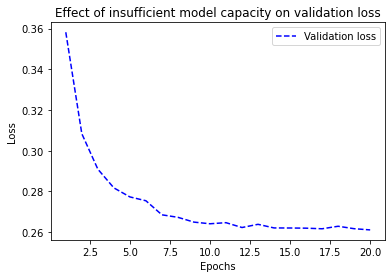

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3497 - accuracy: 0.9007 - val_loss: 0.1733 - val_accuracy: 0.9498
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1555 - accuracy: 0.9539 - val_loss: 0.1458 - val_accuracy: 0.9575
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1111 - accuracy: 0.9663 - val_loss: 0.1057 - val_accuracy: 0.9684
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0857 - accuracy: 0.9740 - val_loss: 0.1063 - val_accuracy: 0.9669
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0686 - accuracy: 0.9792 - val_loss: 0.0987 - val_accuracy: 0.9704
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0556 - accuracy: 0.9831 - val_loss: 0.0968 - val_accuracy: 0.9720
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0458 - accuracy: 0.9864 - val_loss: 0.0968 - val_accuracy: 0.9736
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\hank\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\hank\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant t

Epoch 1/20
30/30 [==============================] - 2s 33ms/step - loss: 0.5047 - accuracy: 0.7812 - val_loss: 0.3654 - val_accuracy: 0.8748
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2954 - accuracy: 0.9035 - val_loss: 0.3176 - val_accuracy: 0.8747
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2207 - accuracy: 0.9261 - val_loss: 0.2848 - val_accuracy: 0.8864
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1714 - accuracy: 0.9445 - val_loss: 0.2940 - val_accuracy: 0.8816
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1437 - accuracy: 0.9533 - val_loss: 0.2806 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1145 - accuracy: 0.9657 - val_loss: 0.2991 - val_accuracy: 0.8860
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0980 - accuracy: 0.9705 - val_loss: 0.3112 - val_accuracy: 0.8841
Epoch 8/20
30

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.5851 - accuracy: 0.7687 - val_loss: 0.4860 - val_accuracy: 0.8575
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4172 - accuracy: 0.8907 - val_loss: 0.3969 - val_accuracy: 0.8705
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3285 - accuracy: 0.9112 - val_loss: 0.3390 - val_accuracy: 0.8844
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2713 - accuracy: 0.9247 - val_loss: 0.3104 - val_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2303 - accuracy: 0.9349 - val_loss: 0.2921 - val_accuracy: 0.8898
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1994 - accuracy: 0.9445 - val_loss: 0.2794 - val_accuracy: 0.8922
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1745 - accuracy: 0.9512 - val_loss: 0.2739 - val_accuracy: 0.8921
Epoch 8/20
30

**Version of the model with higher capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 31ms/step - loss: 0.5310 - accuracy: 0.7443 - val_loss: 0.3751 - val_accuracy: 0.8411
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2531 - accuracy: 0.8985 - val_loss: 0.2955 - val_accuracy: 0.8745
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1499 - accuracy: 0.9429 - val_loss: 0.2877 - val_accuracy: 0.8931
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0769 - accuracy: 0.9743 - val_loss: 0.3731 - val_accuracy: 0.8912
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0929 - accuracy: 0.9780 - val_loss: 0.3390 - val_accuracy: 0.8899
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0048 - accuracy: 0.9995 - val_loss: 0.5008 - val_accuracy: 0.8877
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 4.8063e-04 - accuracy: 1.0000 - val_loss: 0.6011 - val_accuracy: 0.8889
Epoch 8/2

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5990 - accuracy: 0.7715 - val_loss: 0.4726 - val_accuracy: 0.8579
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3902 - accuracy: 0.8959 - val_loss: 0.3814 - val_accuracy: 0.8876
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3250 - accuracy: 0.9139 - val_loss: 0.3595 - val_accuracy: 0.8897
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2918 - accuracy: 0.9262 - val_loss: 0.3530 - val_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2729 - accuracy: 0.9333 - val_loss: 0.3537 - val_accuracy: 0.8895
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2591 - accuracy: 0.9379 - val_loss: 0.3553 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2469 - accuracy: 0.9443 - val_loss: 0.3609 - val_accuracy: 0.8836
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 28ms/step - loss: 0.6148 - accuracy: 0.6616 - val_loss: 0.4893 - val_accuracy: 0.8481
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.4930 - accuracy: 0.7808 - val_loss: 0.3929 - val_accuracy: 0.8770
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.4129 - accuracy: 0.8396 - val_loss: 0.3308 - val_accuracy: 0.8817
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3541 - accuracy: 0.8706 - val_loss: 0.3043 - val_accuracy: 0.8813
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3011 - accuracy: 0.8939 - val_loss: 0.3050 - val_accuracy: 0.8725
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2698 - accuracy: 0.9090 - val_loss: 0.2741 - val_accuracy: 0.8922
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2430 - accuracy: 0.9193 - val_loss: 0.2854 - val_accuracy: 0.8822
Epoch 8/20
30

## Summary